In [10]:
import pandas as pd
import matplotlib.pyplot as plot

sleepDF = pd.read_csv("sleep_survey.csv")
sleepDF.head

<bound method NDFrame.head of           Timestamp     class athlete?            crs_hrs comfort? bed_size  \
0   1/23/2024 21:02    Senior      Yes                 13      Yes    Queen   
1   1/23/2024 21:10    Junior      Yes                 14      Yes  Twin XL   
2   1/23/2024 21:11  Sophmore      Yes                 13      Yes  Twin XL   
3   1/23/2024 21:12   Senior+      Yes                 13      Yes  Twin XL   
4   1/23/2024 21:14  Sophmore      Yes                 12      Yes  Twin XL   
5   1/23/2024 21:28  Freshman      Yes                 12      Yes  Twin XL   
6   1/23/2024 21:35    Junior      Yes                 13      Yes  Twin XL   
7   1/23/2024 21:45   Senior+       No                 15      Yes     Full   
8   1/23/2024 21:57    Senior       No                 15      Yes  Twin XL   
9   1/23/2024 22:19  Freshman      Yes                 13      Yes  Twin XL   
10   1/24/2024 9:32    Senior      Yes                 12      Yes  Twin XL   
11  1/24/2024 10:49   

In [11]:
## drop observations with na values and drop the time stamp variable
filtSleepDF = sleepDF.drop(columns=['Timestamp']).dropna().loc[5:]

In [12]:
filtSleepDF.head

<bound method NDFrame.head of        class athlete?            crs_hrs comfort? bed_size  num_rmates  \
5   Freshman      Yes                 12      Yes  Twin XL           1   
6     Junior      Yes                 13      Yes  Twin XL           1   
7    Senior+       No                 15      Yes     Full           4   
8     Senior       No                 15      Yes  Twin XL           3   
9   Freshman      Yes                 13      Yes  Twin XL           1   
10    Senior      Yes                 12      Yes  Twin XL           3   
11    Senior       No                 12       No  Twin XL           0   
12    Junior      Yes                 15      Yes  Twin XL           3   
13    Junior      Yes                 14      Yes  Twin XL           0   
14    Junior      Yes                 17       No  Twin XL           1   
15    Junior      Yes                 13      Yes  Twin XL           1   
16  Sophmore      Yes                 16      Yes  Twin XL           1   
17  Soph

Questions about "Who": class, athlete?, crs_hours

In [13]:
## class percentages
class_group = filtSleepDF.groupby("class").size()
class_group

class
Freshman     3
Junior      25
Senior       9
Senior+      4
Sophmore     4
dtype: int64

<function matplotlib.pyplot.show(close=None, block=None)>

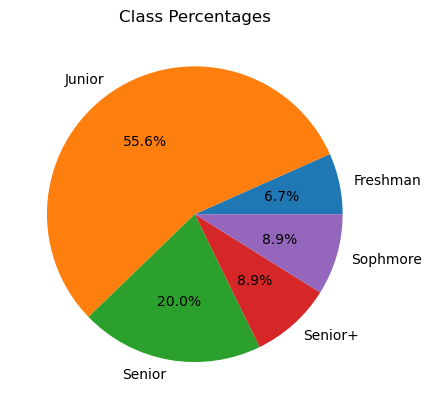

In [14]:
plot.pie(class_group, labels=class_group.index, autopct='%1.1f%%')
plot.title("Class Percentages")
plot.show


In [15]:
## Athlete percentages
athlete_group = filtSleepDF.groupby("athlete?").size()
athlete_group

athlete?
No      7
Yes    38
dtype: int64

<function matplotlib.pyplot.show(close=None, block=None)>

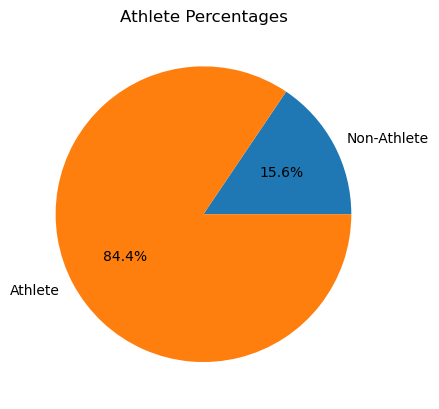

In [16]:
labels = ['Non-Athlete', 'Athlete']

plot.pie(athlete_group, labels=labels, autopct='%1.1f%%')
plot.title("Athlete Percentages")
plot.show

In [17]:
## Group by course hours
crs_hrs_group = filtSleepDF.groupby("crs_hrs").size()
crs_hrs_group

crs_hrs
12                   11
13                    7
14                    5
15                    8
16                    7
17                    6
Teaching 10 hours     1
dtype: int64

<function matplotlib.pyplot.show(close=None, block=None)>

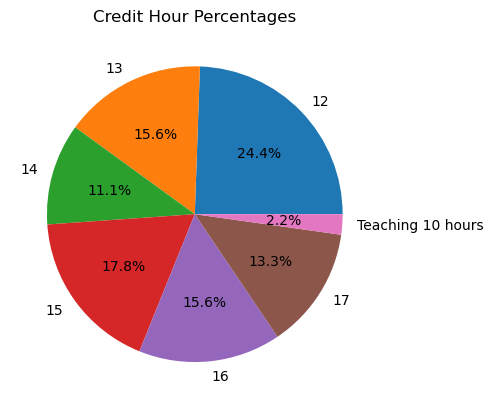

In [49]:
plot.pie(crs_hrs_group, labels=crs_hrs_group.index, autopct='%1.1f%%')
plot.title("Credit Hour Percentages")
plot.show

Questions about "What": Comfort, sleep_posn

In [19]:
comfort_group = filtSleepDF.groupby("comfort?").size()
comfort_group

comfort?
No      2
Yes    43
dtype: int64

<function matplotlib.pyplot.show(close=None, block=None)>

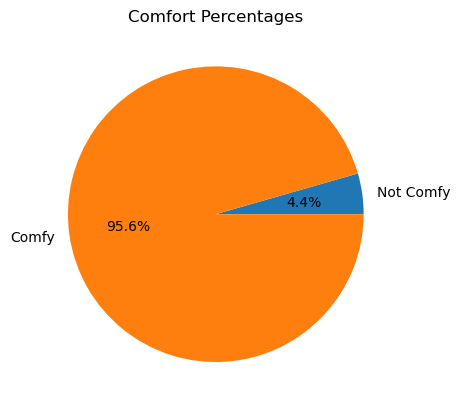

In [51]:
## group by comfort
labels = ["Not Comfy", "Comfy"]
plot.pie(comfort_group, labels=labels, autopct='%1.1f%%')
plot.title("Comfort Percentages")
plot.show

In [21]:
sleep_posn_group = filtSleepDF.groupby("sleep_posn").size()
sleep_posn_group

sleep_posn
Back                    5
Back, Side             10
Back, Side, Stomach     5
Side                   14
Side, Stomach           7
Stomach                 4
dtype: int64

<function matplotlib.pyplot.show(close=None, block=None)>

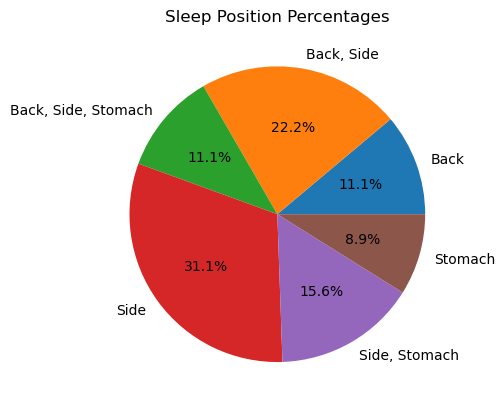

In [52]:
plot.pie(sleep_posn_group, labels=sleep_posn_group.index, autopct='%1.1f%%')
plot.title("Sleep Position Percentages")
plot.show

Questions about "When": hrs_sleep, morn_night, bedtimes

In [23]:
## group by hours of sleep
hrs_sleep_group = filtSleepDF.groupby("hrs_sleep").size()
## chatgpt begin
categories = ['4+', '6+', '8+', '10+']
hrs_sleep_group = hrs_sleep_group.reindex(categories, fill_value=0)
##chatgpt end
hrs_sleep_group


hrs_sleep
4+      2
6+     31
8+     12
10+     0
dtype: int64

ChatGPT propmt: The indexs are 4+, 6+, 8+, and 10+, but since none answered 10+ it is not showing up, how do i go about adding it to the pie chart

ChatGPT answer: if you want to ensure that all categories, including those with zero counts, are represented in your hrs_sleep_group series when creating a pie chart, you can use the reindex() function to explicitly include the missing categories and assign them zero counts.

Code snippets are marked in the cell above

<function matplotlib.pyplot.show(close=None, block=None)>

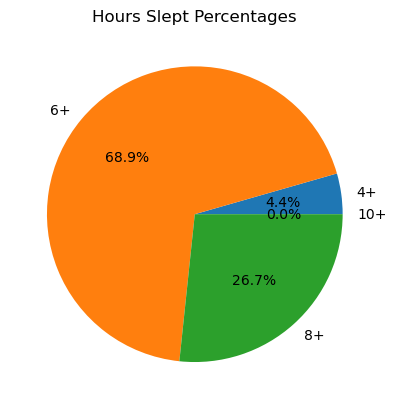

In [53]:
plot.pie(hrs_sleep_group, labels=hrs_sleep_group.index, autopct='%1.1f%%')
plot.title("Hours Slept Percentages")
plot.show


In [25]:
## group by morning or night person
morn_night_group = filtSleepDF.groupby("morn_night").size()
morn_night_group


morn_night
Morning    21
Night      24
dtype: int64

<function matplotlib.pyplot.show(close=None, block=None)>

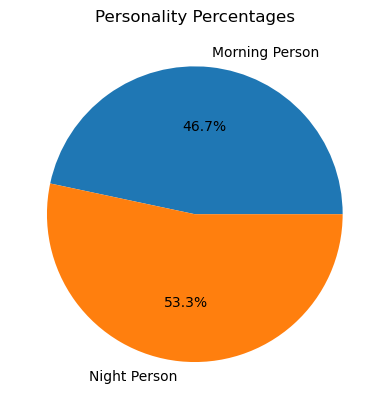

In [54]:
labels = ["Morning Person", "Night Person"]
plot.pie(morn_night_group, labels=labels, autopct='%1.1f%%')
plot.title("Personality Percentages")
plot.show

In [27]:
## group by bed time
bed_times_group = filtSleepDF.groupby("bed_times").size()
bed_times_group


bed_times
1 am, 2 am                         2
1 am, 2 am, 3 am                   2
10 pm, 11 pm                       6
10 pm, 11 pm, 12 am                6
10 pm, 11 pm, 12 am, 1 am          2
10:00 PM                           4
11 pm, 12 am                       4
11 pm, 12 am, 1 am                 4
11:00 PM                           2
12 am, 1 am                        1
12 am, 1 am, 2 am                  2
12:00 AM                           3
8 pm, 9 pm, 10 pm, 11 pm, 12 am    1
9 pm, 10 pm                        4
9 pm, 10 pm, 11 pm                 2
dtype: int64

<function matplotlib.pyplot.show(close=None, block=None)>

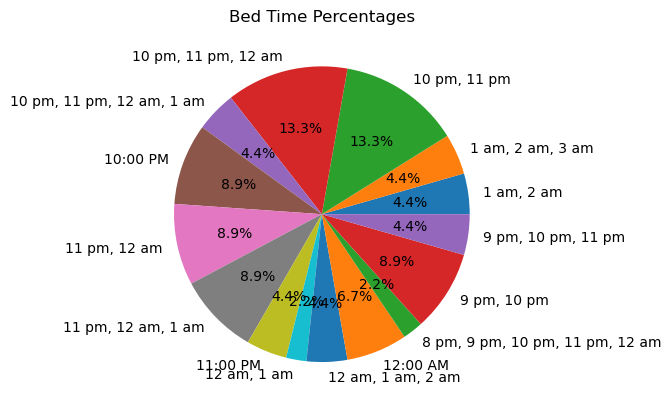

In [55]:
count = bed_times_group.sum()
plot.pie(bed_times_group, labels= bed_times_group.index, autopct='%1.1f%%', )
plot.title("Bed Time Percentages")
plot.show

Questions about "Where": num_roomates, bed size

In [29]:
## group by number of roomates
rmt_group = filtSleepDF.groupby("num_rmates").size()
rmt_group


num_rmates
0     7
1    22
2     3
3     6
4     7
dtype: int64

<function matplotlib.pyplot.show(close=None, block=None)>

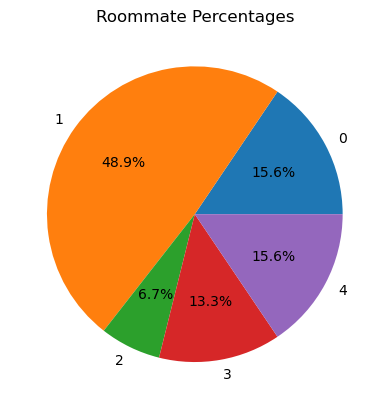

In [56]:
plot.pie(rmt_group, labels=rmt_group.index, autopct='%1.1f%%')
plot.title("Roommate Percentages")
plot.show

In [31]:
filtSleepDF["num_rmates"].mean()


1.6444444444444444

In [32]:
filtSleepDF["num_rmates"].median()

1.0

In [33]:
filtSleepDF["num_rmates"].mode()

0    1
Name: num_rmates, dtype: int64

In [34]:
bed_group = filtSleepDF.groupby("bed_size").size()
bed_group


bed_size
Full        5
King        1
Queen       8
Twin XL    31
dtype: int64

<function matplotlib.pyplot.show(close=None, block=None)>

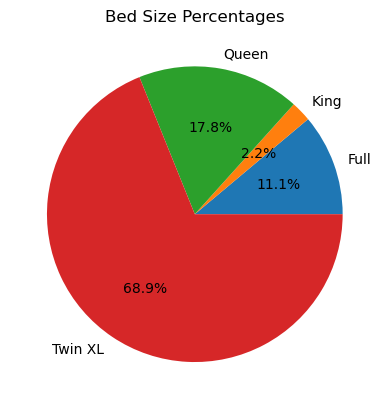

In [57]:
plot.pie(bed_group, labels=bed_group.index, autopct='%1.1f%%')
plot.title("Bed Size Percentages")
plot.show

Questions about "Why": refreshed?, why_sleep, quality 


In [36]:
## refreshed group
refreshed_group = filtSleepDF.groupby("refreshed?").size()
refreshed_group

refreshed?
No     17
Yes    28
dtype: int64

<function matplotlib.pyplot.show(close=None, block=None)>

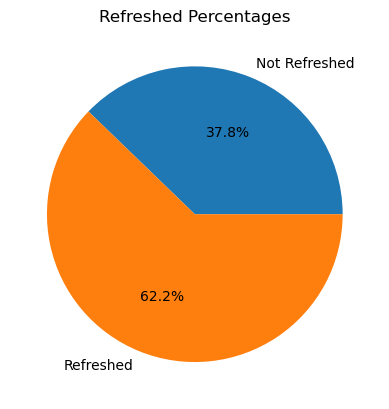

In [58]:
labels = ['Not Refreshed', 'Refreshed']
plot.pie(refreshed_group, labels=labels, autopct='%1.1f%%')
plot.title("Refreshed Percentages")
plot.show

In [38]:
## why sleep
why_sleep_group = filtSleepDF.groupby("why_sleep").size()
why_sleep_group

why_sleep
Athletic Performance                                                                                   1
Mental Health, Academic Performance, An escape from reality                                            1
Physical Health, Academic Performance, Athletic Performance                                            3
Physical Health, Athletic Performance                                                                  2
Physical Health, Mental Health                                                                         6
Physical Health, Mental Health, Academic Performance                                                   5
Physical Health, Mental Health, Academic Performance, Athletic Performance                            17
Physical Health, Mental Health, Academic Performance, Athletic Performance, An escape from reality     6
Physical Health, Mental Health, Athletic Performance                                                   3
Physical Health, Mental Health, Athletic Perf

<function matplotlib.pyplot.show(close=None, block=None)>

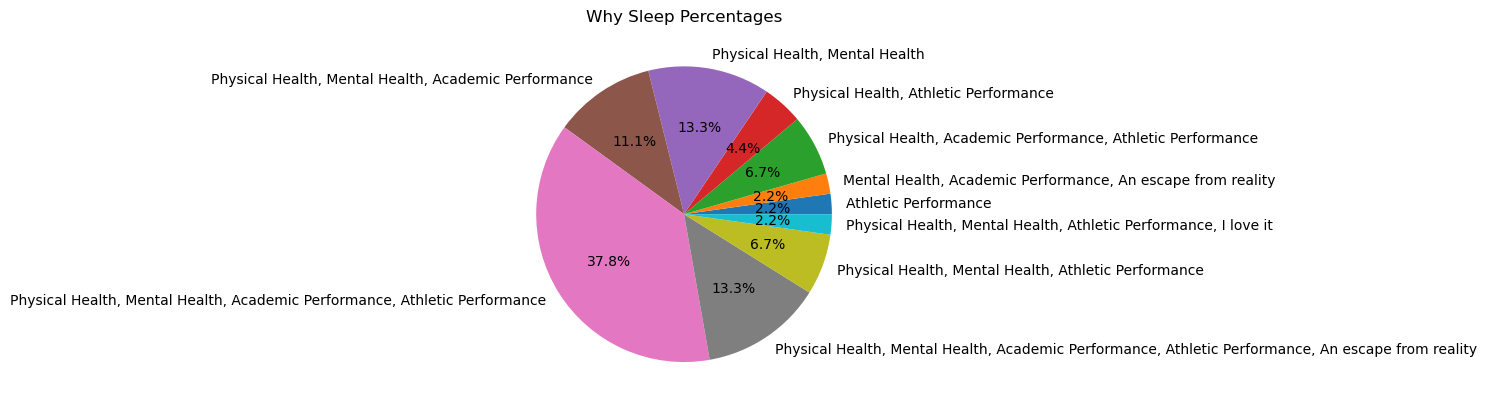

In [59]:
plot.pie(why_sleep_group, labels=why_sleep_group.index, autopct='%1.1f%%')
plot.title("Why Sleep Percentages")
plot.show

In [40]:
quality_group = filtSleepDF.groupby("sleep_quality").size()
quality_group

sleep_quality
Good        23
Great        5
Mediocre    12
Poor         5
dtype: int64

<function matplotlib.pyplot.show(close=None, block=None)>

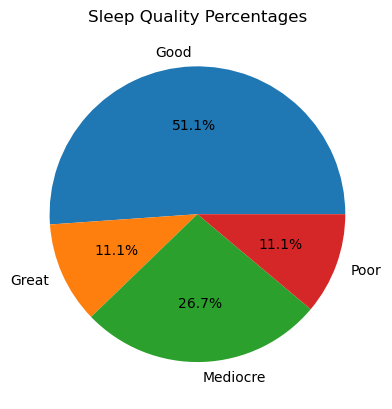

In [61]:
plot.pie(quality_group, labels=quality_group.index, autopct='%1.1f%%')
plot.title("Sleep Quality Percentages")
plot.show

Questions about "How": hot_cold, noise_silence, sleep_variety

In [42]:
hot_cold_group = filtSleepDF.groupby("hot_cold").size()
hot_cold_group

hot_cold
Cold    44
Hot      1
dtype: int64

<function matplotlib.pyplot.show(close=None, block=None)>

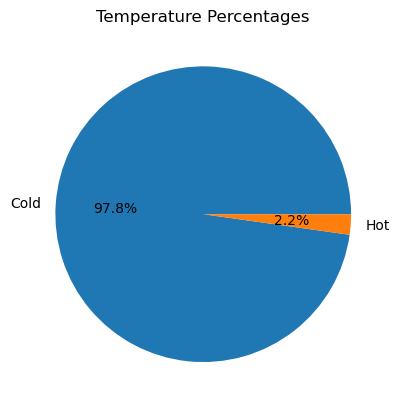

In [62]:
plot.pie(hot_cold_group, labels=hot_cold_group.index, autopct='%1.1f%%')
plot.title("Temperature Percentages")
plot.show

In [44]:
noise_silence_group = filtSleepDF.groupby("noise_silence").size()
noise_silence_group

noise_silence
Noise      12
Silence    33
dtype: int64

<function matplotlib.pyplot.show(close=None, block=None)>

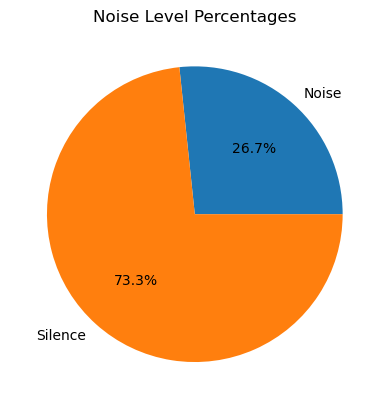

In [64]:
plot.pie(noise_silence_group, labels=noise_silence_group.index, autopct='%1.1f%%')
plot.title("Noise Level Percentages")
plot.show

In [46]:
slp_var_gropup = filtSleepDF.groupby("sleep_variety").size()
slp_var_gropup

sleep_variety
Heavy     10
Light      9
Medium    26
dtype: int64

<function matplotlib.pyplot.show(close=None, block=None)>

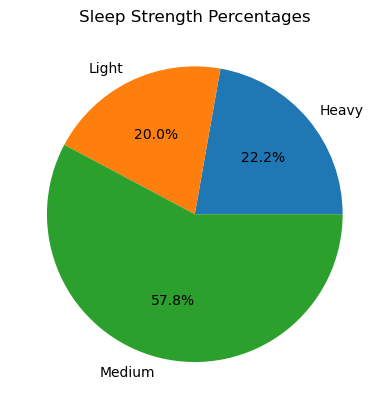

In [65]:
plot.pie(slp_var_gropup, labels=slp_var_gropup.index, autopct='%1.1f%%')
plot.title("Sleep Strength Percentages")
plot.show